data size: 200


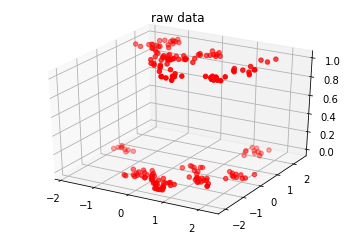

In [19]:
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
from numpy import dot
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from numpy import where



# Helper functions
def mdot(*args):
    """Multi argument dot function. http://wiki.scipy.org/Cookbook/MultiDot"""
    return reduce(np.dot, args)


def prepend_one(X):
    """prepend a one vector to X."""
    return np.column_stack([np.ones(X.shape[0]), X])


def grid2d(start, end, num=50):
  """Create an 2D array where each row is a 2D coordinate.
  np.meshgrid is pretty annoying!
  """
  dom = np.linspace(start, end, num)
  X0, X1 = np.meshgrid(dom, dom)
  return np.column_stack([X0.flatten(), X1.flatten()])

# load the data
data = np.loadtxt("data2Class.txt")
# split into features and labels
X, y = data[:, :2], data[:, 2]
print("data size:", y.size)
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")  # the projection arg is important!
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_title("raw data")
plt.draw()  # show, use plt.show() for blocking

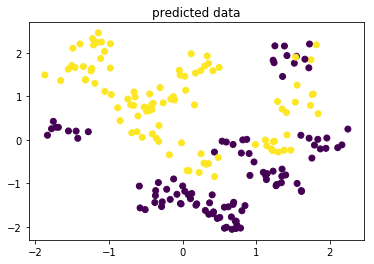

In [21]:
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111)  # the projection part is important
ax.scatter(X[:, 0],  X[:, 1],c=y)  # also show the real data
ax.set_title("predicted data")
plt.show()

optimal beta:  [ 0.01388673 -0.5175884   1.25336554]
mean neg-log-likelihood: -0.02262081889360064
raw data size: 200
predicted data size: 900


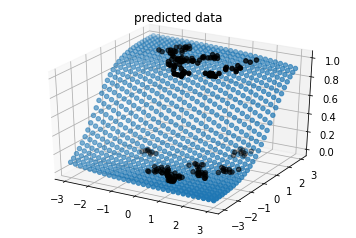

In [16]:
#prepare for regression
fX=prepend_one(X)
lamda=0
# function to calculate p
def p_X(beta):
    z=dot(fX, beta)
    p=1/(1+np.exp(-z))
    return p


# function to calculate W
def W_p(beta):
    W=np.diag((p_X(beta)*(1-p_X(beta))))
    return W

def Loss(beta):
    loss=-np.sum(y*np.log(p_X(beta))+(1-y)*np.log(1-p_X(beta)))+lamda*np.sum(np.square(beta))
    return loss


# gradient of Loss Function
def grad_L(beta):
    grad=dot(fX.T,(p_X(beta)-y))+2*lamda*dot(np.identity(beta.size), beta)
    return grad


# second gradient of Loss Function
def grad2_L(beta):
    grad2=mdot(fX.T, W_p(beta), fX)+ 2*lamda*np.identity(beta.size)
    return grad2

# compute optimal parameter beta
beta =np.zeros((3, ))
for i in range(10):
    beta=beta-dot(inv(grad2_L(beta)), grad_L(beta)) 
print("optimal beta: " ,beta )


# compute mean neg-log-likelihood
m_nll=-np.log(Loss(beta))/200
print("mean neg-log-likelihood:", m_nll)



# prep for prediction
X_grid = prepend_one(grid2d(-3, 3, num=30))

# Predict with trained model
y_grid = 1/(1+np.exp(-dot(X_grid, beta)))
print("raw data size:", y.size)
print("predicted data size:", y_grid.size)


# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # the projection part is important
ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid)  # don't use the 1 infront
ax.scatter(X[:, 0], X[:, 1], y, color="black")  # also show the real data
ax.set_title("predicted data")
plt.show()

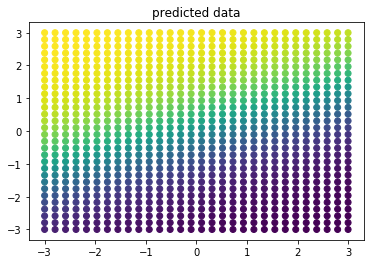

In [17]:
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111)  # the projection part is important
ax.scatter(X_grid[:, 1],  X_grid[:, 2],c=y_grid)  # also show the real data
ax.set_title("predicted data")
plt.show()

optimal beta:  [ 2.19909118  0.66928365  3.54389663 -1.36923952 -0.9490701  -1.26661655]
mean neg-log-likelihood: -0.020189702409331337
raw data size: 200
predicted data size: 900


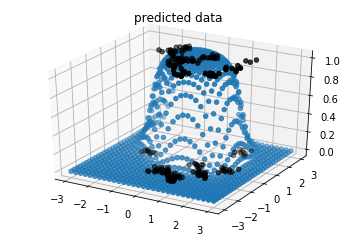

In [14]:
#prepare for regression
quad=PolynomialFeatures(2)
fX=quad.fit_transform(X)
lamda=0

# compute optimal parameter beta
beta =np.zeros((6, ))
for i in range(10):
    beta=beta-dot(inv(grad2_L(beta)), grad_L(beta)) 
print("optimal beta: " ,beta )


# compute mean neg-log-likelihood
m_nll=-np.log(Loss(beta))/200
print("mean neg-log-likelihood:", m_nll)



# prep for prediction
X_grid = quad.fit_transform(grid2d(-3, 3, num=30))

# Predict with trained model
y_grid = 1/(1+np.exp(-dot(X_grid, beta)))
print("raw data size:", y.size)
print("predicted data size:", y_grid.size)


# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # the projection part is important
ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid)  # don't use the 1 infront
ax.scatter(X[:, 0], X[:, 1], y, color="black")  # also show the real data
ax.set_title("predicted data")
plt.show()

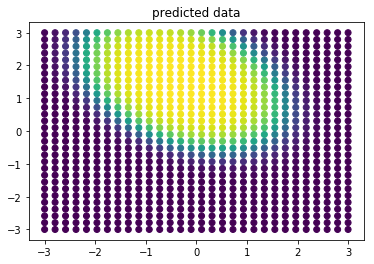

In [15]:
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111)  # the projection part is important
ax.scatter(X_grid[:, 1],  X_grid[:, 2],c=y_grid)  # also show the real data
ax.set_title("predicted data")
plt.show()